#エラーは下がってるけどhistogramはぜんぜん違う
#なぜか0.5以下になってる
#もっと評価基準が必要

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cPickle
import gzip

In [3]:
import scipy.io as sio

In [4]:
pred_list = []
for L in [2, 4, 6, 8]:
    ms = sio.loadmat('pred'+str(L)+'.mat')
    pred_list.append(ms['pred'])

(855000, 10)
(855000, 18)
(855000, 26)
(855000, 34)


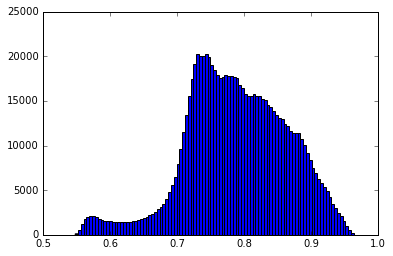

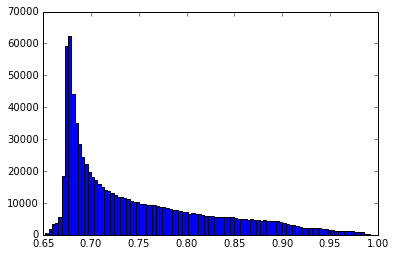

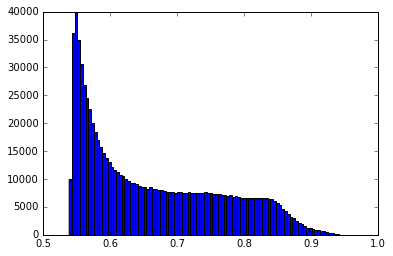

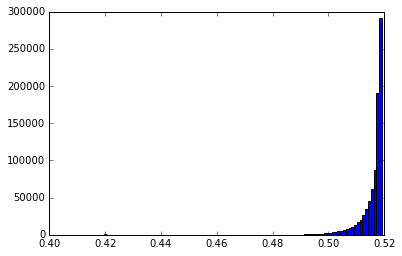

In [14]:
for pred in pred_list:
    print pred.shape
    plt.figure()
    st = plt.hist(np.linalg.norm(pred, axis=1), bins=100)

In [15]:
# なんで 0.5以下になるの？？？
st

(array([  2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   5.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          4.00000000e+00,   5.00000000e+00,   5.00000000e+00,
          7.00000000e+00,   2.00000000e+00,   6.00000000e+00,
          6.00000000e+00,   8.00000000e+00,   4.00000000e+00,
        

(855000, 10)
(855000, 18)
(855000, 26)
(855000, 34)


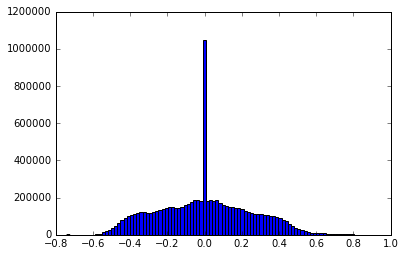

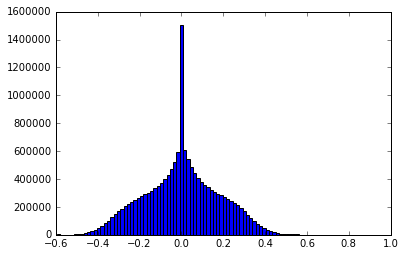

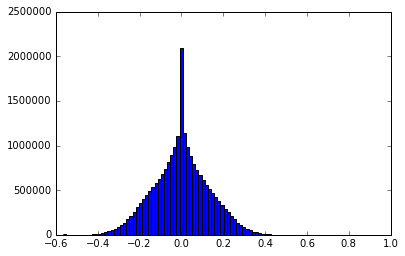

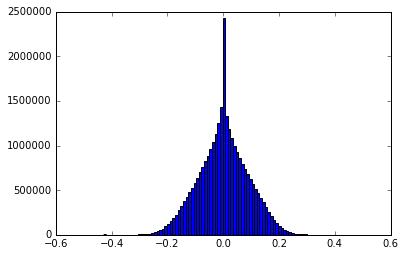

In [7]:
for pred in pred_list:
    print pred.shape
    plt.figure()
    st = plt.hist(pred.flatten(), bins=100)

In [8]:
summary_list = []
for L in [2, 4, 6, 8]:
    with gzip.open('summary'+str(L)+'.pkl.gz', 'rb') as f:
        summary_list.append(cPickle.load(f))

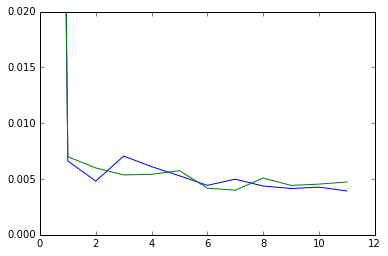

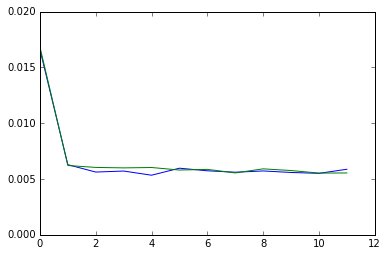

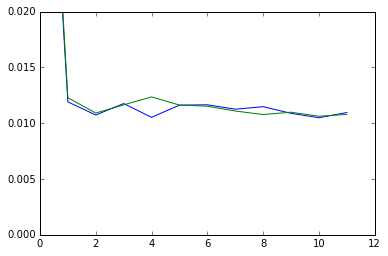

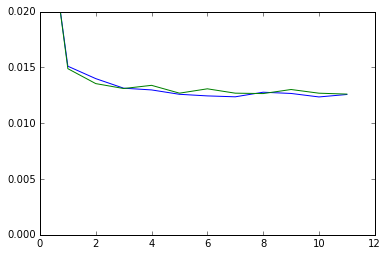

In [9]:
for summary in summary_list:
    plt.figure()
    plt.plot(dict(summary)['training_error_array'])
    plt.plot(dict(summary)['test_error_array'])
    plt.ylim(0., 0.02)

(0.0, 0.02)

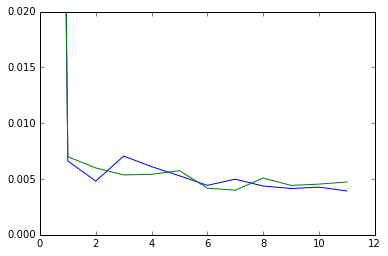

In [10]:
plt.plot(dict(summary_list[0])['training_error_array'])
plt.plot(dict(summary_list[0])['test_error_array'])
plt.ylim(0., 0.02)

(0.016, 0.018)

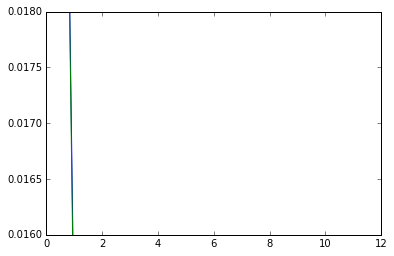

In [11]:
plt.plot(dict(summary_list[3])['training_error_array'])
plt.plot(dict(summary_list[3])['test_error_array'])
plt.ylim(0.016, 0.018)

In [12]:
dict(summary_list[3])

{'N': 80000,
 'batch_size': 1000,
 'compile_time': 23170.918581,
 'func_key_list': ['relu', '0.5*sigmoid+0.5'],
 'lr_decay': 0.95,
 'n_hidden_tensors': 100,
 'test_error_array': array([ 0.03377939,  0.01488622,  0.01354819,  0.01310774,  0.01339262,
         0.01269155,  0.01308113,  0.01269054,  0.0126548 ,  0.01301906,
         0.01268866,  0.01260753]),
 'train_time': 33365.731004999994,
 'training_error_array': array([ 0.03344205,  0.01510602,  0.01399438,  0.01313728,  0.01298171,
         0.0125903 ,  0.01244631,  0.01236469,  0.01277592,  0.01266574,
         0.0123531 ,  0.01257204])}